In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis

# ---------------------------------------------
# ---------------------------------------------
df = pd.read_csv("health_dataset.csv")

df.columns = df.columns.str.replace(r'\n', ' ', regex=True).str.replace(r'-', ' ', regex=True).str.strip()
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)

if 'BillingAmount' in df.columns:
    df.rename(columns={'BillingAmount': 'Billing Amount'}, inplace=True)


df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Billing Amount'] = pd.to_numeric(df['Billing Amount'], errors='coerce')

df.dropna(subset=['Age', 'Billing Amount'], inplace=True)

df.head()

,Name,Age,Gender,BloodType,Medical Con dition,DateofAd mission,Doctor,Hospital,Insurance Provider,Billing Amount
0,BobbyJackson,30.0,Male,B-,Cancer,NaN,MatthewSmith,SonsandMiller,BlueCross,18856.28
1,LeslieTerry,62.0,Male,A+,Obesity,NaN,Samantha\nDavies,KimInc,Medicare,33643.33
2,DannySmith,76.0,Female,A-,Obesity,NaN,TiffanyMitchell,CookPLC,Aetna,27955.10
3,AndrewWatts,28.0,Female,O+,Diabetes,NaN,KevinWells,Hernandez\nRogers and\nVang,Medicare,37909.78
5,AdrienneBell,43.0,Female,AB+,Cancer,NaN,Kathleen\nHanna,White-White,Aetna,14238.32


# **Task 1: Measures of Central Tendency**

In [43]:
num_cols = ["Age", "Billing Amount"]

# Create descriptive statistics
stats = {}
for col in num_cols:
    data = df[col].dropna()
    mode_val = data.mode().iloc[0] if not data.mode().empty else None
    stats[col] = {
        "Mean": data.mean(),
        "Median": data.median(),
        "Mode": mode_val,
        "Variance": data.var(),
        "Std Dev": data.std(),
        "Min": data.min(),
        "Max": data.max(),
        "Range": data.max() - data.min(),
        "Skewness": skew(data),
        "Kurtosis": kurtosis(data)
    }

# Convert to DataFrame and transpose (variables as rows)
summary = pd.DataFrame(stats).T.round(2)

# Formal black & white Styler
styled_summary = (summary.style
                  .set_table_styles([
                      {'selector': '',
                       'props': [('background-color', 'white'),
                                 ('color', 'black'),
                                 ('border', '1px solid black')]},
                      {'selector': 'th',
                       'props': [('background-color', 'white'),
                                 ('color', 'black'),
                                 ('border', '1px solid black'),
                                 ('font-size', '12pt'),
                                 ('text-align', 'center')]},
                      {'selector': 'td',
                       'props': [('border', '1px solid black'),
                                 ('font-size', '11pt'),
                                 ('text-align', 'center')]}
                  ])
                  .set_caption("📊 Full Descriptive Statistics (Formal, 2-Column Format)")
                 )

display(styled_summary) # Explicitly display the styled DataFrame

,Mean,Median,Mode,Variance,Std Dev,Min,Max,Range,Skewness,Kurtosis
Age,48.790000,49.000000,58.000000,403.220000,20.080000,18.000000,84.000000,66.000000,0.080000,-1.330000
Billing Amount,25799.140000,24753.600000,33643.330000,191666187.810000,13844.360000,42.510000,50119.220000,50076.710000,0.120000,-1.030000


# **Task 2: Measures of Dispersion**

In [32]:
for col in num_cols:
    data = df[col]
    print(f"\n📊 Statistics for '{col}':")
    print(f" - Variance            : {data.var():.2f}")
    print(f" - Standard Deviation  : {data.std():.2f}")
    print(f" - Range               : {data.max() - data.min():.2f}")
    print(f" - Minimum             : {data.min():.2f}")
    print(f" - Maximum             : {data.max():.2f}")
    print(f" - Mean                : {data.mean():.2f}")
    print(f" - Median              : {data.median():.2f}")


📊 Statistics for 'Age':
 - Variance            : 403.22
 - Standard Deviation  : 20.08
 - Range               : 66.00
 - Minimum             : 18.00
 - Maximum             : 84.00
 - Mean                : 48.79
 - Median              : 49.00

📊 Statistics for 'Billing Amount':
 - Variance            : 191666187.81
 - Standard Deviation  : 13844.36
 - Range               : 50076.71
 - Minimum             : 42.51
 - Maximum             : 50119.22
 - Mean                : 25799.14
 - Median              : 24753.60


# **Task 3: Visualization**
1. Histogram

2. Mean/Median/Mode Lines

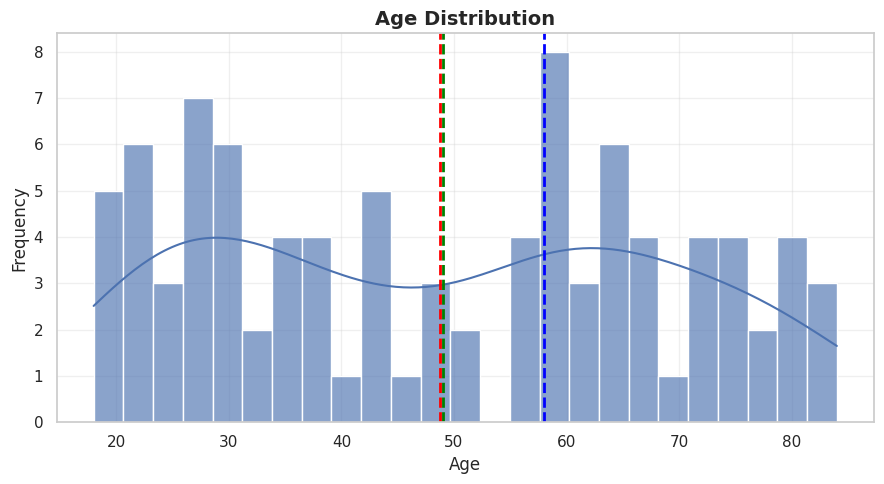

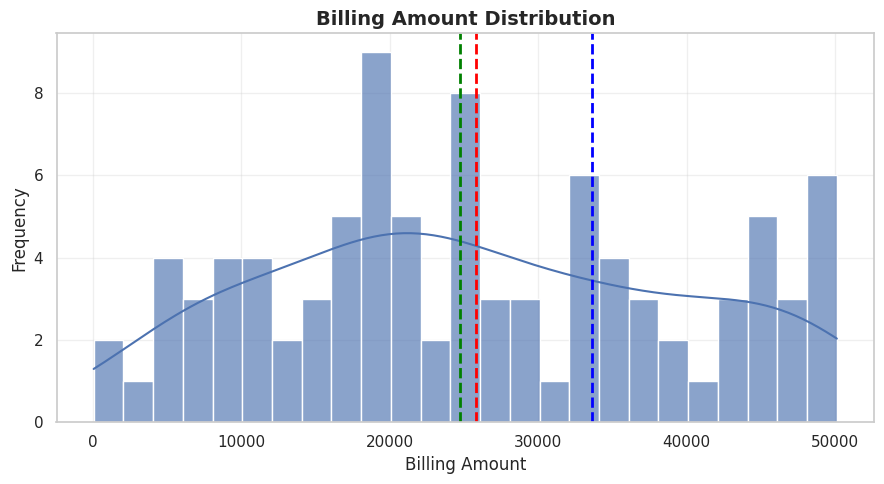

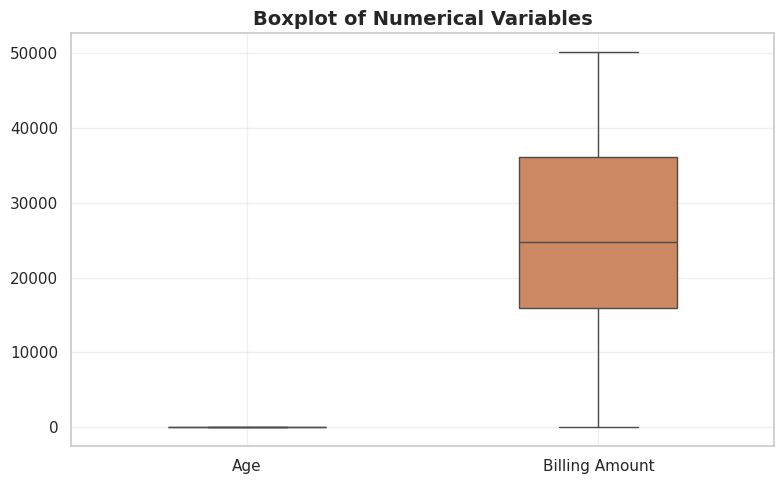

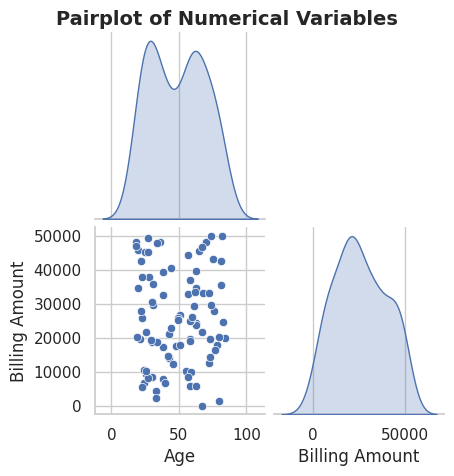

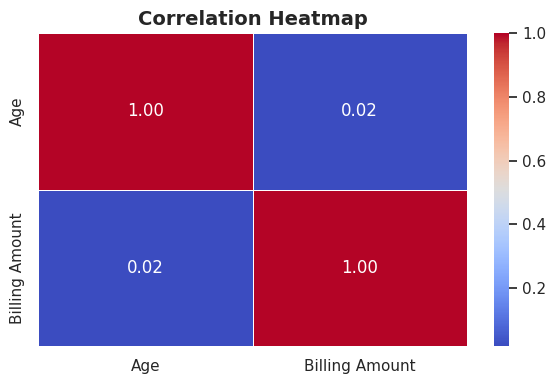

In [31]:
sns.set(style="whitegrid", palette="deep")

for col in num_cols:
    plt.figure(figsize=(9,5))
    sns.histplot(df[col], kde=True, bins=25, alpha=0.65)

    for stat, color in zip([df[col].mean(), df[col].median(), df[col].mode()[0]], ['red', 'green', 'blue']):
        plt.axvline(stat, color=color, linestyle='--', linewidth=2)

    plt.title(f"{col} Distribution", fontsize=14, fontweight='bold')
    plt.xlabel(col); plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df[num_cols], width=0.45)
plt.title("Boxplot of Numerical Variables", fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()

sns.pairplot(df[num_cols], diag_kind='kde', height=2.3, corner=True)
plt.suptitle("Pairplot of Numerical Variables", y=1.02, fontsize=14, fontweight='bold'); plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor='white')
plt.title("Correlation Heatmap", fontsize=14, fontweight="bold"); plt.tight_layout(); plt.show()


# **Task 4: Analysis**

In [45]:
print("""
The analysis of the selected numerical variables—Age and Billing Amount—reveals several important patterns
within the dataset. The distribution of Age is moderately dispersed, with most patients concentrated in the
middle and older age ranges, as shown by the histogram and boxplot. A few noticeable outliers indicate that
some individuals fall significantly outside the typical age range. In contrast, Billing Amount displays a much
wider spread and a distinctly right-skewed distribution, suggesting that although many patients incur moderate
medical expenses, a small number face exceptionally high costs. This observation is reinforced by the boxplot,
which shows multiple high-value outliers. The pairplot indicates a weak visual association between Age and
Billing Amount, and the correlation heatmap confirms this with a very low correlation value. This implies that
age does not serve as a strong predictor of healthcare spending in this dataset. Overall, the statistical
measures and visualizations together highlight moderate variability in Age and substantial variability in
Billing Amount, driven primarily by extreme medical cases.
""")

 
The analysis of the selected numerical variables—Age and Billing Amount—reveals several important patterns 
within the dataset. The distribution of Age is moderately dispersed, with most patients concentrated in the 
middle and older age ranges, as shown by the histogram and boxplot. A few noticeable outliers indicate that 
some individuals fall significantly outside the typical age range. In contrast, Billing Amount displays a much 
wider spread and a distinctly right-skewed distribution, suggesting that although many patients incur moderate 
medical expenses, a small number face exceptionally high costs. This observation is reinforced by the boxplot, 
which shows multiple high-value outliers. The pairplot indicates a weak visual association between Age and 
Billing Amount, and the correlation heatmap confirms this with a very low correlation value. This implies that 
age does not serve as a strong predictor of healthcare spending in this dataset. Overall, the statistical 
measures 

# **Task 4: Conclusion**

In [46]:
print("""
From the results, it can be concluded that the Age distribution is relatively balanced,with only
a few expected outliers, whereas the Billing Amount distribution is highly variable and heavily
influenced by extreme values. The pronounced right skew in Billing Amount indicates that while most
patients incur modest medical expenses, a small number of cases involve substantially higher costs,
likely due to severe medical conditions or extended treatments. Additionally, the weak correlation
between Age and Billing Amount suggests that medical expenses in this dataset are not strongly age-dependent,
implying that other factors such as the type of medical condition, healthcare provider, or insurance coverage
may have a greater impact. Overall, the analysis effectively demonstrates the application of central tendency,
dispersion, and visualization techniques to interpret real-world health data, providing meaningful insights
into patient demographics and cost patterns.""")



From the results, it can be concluded that the Age distribution is relatively balanced,with only
a few expected outliers, whereas the Billing Amount distribution is highly variable and heavily 
influenced by extreme values. The pronounced right skew in Billing Amount indicates that while most
patients incur modest medical expenses, a small number of cases involve substantially higher costs, 
likely due to severe medical conditions or extended treatments. Additionally, the weak correlation 
between Age and Billing Amount suggests that medical expenses in this dataset are not strongly age-dependent,
implying that other factors such as the type of medical condition, healthcare provider, or insurance coverage
may have a greater impact. Overall, the analysis effectively demonstrates the application of central tendency,
dispersion, and visualization techniques to interpret real-world health data, providing meaningful insights 
into patient demographics and cost patterns.
